<a href="https://colab.research.google.com/github/Chandra-data-ent/Chandra-data-ent/blob/main/3_Player_of_the_Match.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**WELCOME TO IPL WINNER PREDICTION PORTAL!**

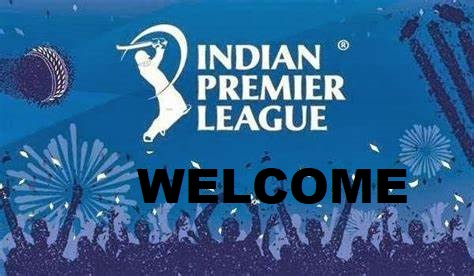

***PLEASE FOLLOW THE INSRUCTIONS MENTIONED AND PREDICT THE WINNER OF THE UPCOMING IPL MATCHES!!!***

In [ ]:
#@title **Click the below button to view the details of the teams playing this season.** { display-mode: "form" }
import pandas as pd
import seaborn as sns
from datetime import date
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from google.colab import files


file_path = "/matches.csv"
matches = pd.read_csv(file_path)

matches

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [ ]:
#@title **Click play button if you want to update the team names.** { form-width: "100px", display-mode: "form" }
matches.replace('Rising Pune Supergiant','Rising Pune Supergiants',inplace=True)
matches.replace('Delhi Daredevils','Delhi Capitals',inplace=True)
matches.replace('Deccan chargers','Sun Risers Hyderabad',inplace=True)

print ("The team names have been updated!")

The team names have been updated!


In [ ]:
#@title **Update the venue and match winner list here!!**
# Ask the user if they want to update the Umpires and previous match winner status
update_status = input("Do you want to update the venues and previous match winner status from the above list? (Yes/No): ")

# If the user enters Yes, then run the code and display a thank you message
if update_status.lower() == "yes":
    matches.isnull().any()
    matches.drop(['umpire1','umpire2','umpire3'],axis=1,inplace=True)
    I=matches[matches['winner'].isnull()==True].index
    matches.drop(I,inplace=True)
    I2=matches[matches['city'].isnull()==True].index
    matches.drop(I2,inplace=True)
    print("Thank you for updating!")

# Otherwise, do nothing
else:
    print("No changes will be made.")


Do you want to update the venues and previous match winner status from the above list? (Yes/No): yes
Thank you for updating!


# **Player and winner of the match prediction**

In [ ]:
#@title **Predict now!**
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.simplefilter("ignore", FutureWarning)

print("NOTE: Teams playing this season: MI, CSK, SRH, RCB, KKR, KXIP, DC, RR")

# Mapping dictionary for team abbreviations
team_mapping = {
    'mi': 'Mumbai Indians',
    'csk': 'Chennai Super Kings',
    'srh': 'Sunrisers Hyderabad',
    'rcb': 'Royal Challengers Bangalore',
    'kkr': 'Kolkata Knight Riders',
    'kxip': 'Kings XI Punjab',
    'dc': 'Delhi Capitals',
    'rr': 'Rajasthan Royals'
}

# Separate the features (X) and target variable (y)
X = matches[['team1', 'team2', 'toss_winner', 'toss_decision']].copy()
y = matches[['winner', 'player_of_match']].copy()

# Drop rows with missing values
X.dropna(inplace=True)
y.dropna(inplace=True)

# Encode categorical variables using LabelEncoder and OneHotEncoder
label_encoder = LabelEncoder()
X_encoded = X.copy()
X_encoded['toss_decision'] = label_encoder.fit_transform(X_encoded['toss_decision'])

onehot_encoder = OneHotEncoder(sparse=False, drop='first')
X_encoded = onehot_encoder.fit_transform(X_encoded)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train the machine learning model (Random Forest Classifier)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Get user inputs
team1 = input("To predict the Player and winner of the match, Enter the playing Team 1, preferably the home team: ").lower()
team2 = input("Enter playing Team 2: ").lower()
toss_winner = input("Enter toss winner: ").lower()
toss_decision = input("Enter toss decision (field/bat): ").lower()

# Check if Team 1 and Team 2 are the same
if team1 == team2:
    print("Team 1 and Team 2 cannot be the same.")
else:
    # Check if toss winner is valid
    if toss_winner not in [team1, team2]:
        print("Please enter a valid input for the toss winner.")
    else:
        # Map user inputs to full team names
        team1 = team_mapping.get(team1, team1.title())
        team2 = team_mapping.get(team2, team2.title())
        toss_winner = team_mapping.get(toss_winner, toss_winner.title())

        # Transform user inputs using LabelEncoder and OneHotEncoder
        user_input = pd.DataFrame({'team1': [team1], 'team2': [team2],
                                   'toss_winner': [toss_winner], 'toss_decision': [toss_decision]}).copy()
        user_input_encoded = user_input.copy()
        user_input_encoded['toss_decision'] = label_encoder.transform(user_input_encoded['toss_decision'])
        user_input_encoded = onehot_encoder.transform(user_input_encoded)

        # Make predictions
        predicted_winner = model.predict(user_input_encoded)[0][0]
        predicted_player_of_match = model.predict(user_input_encoded)[0][1]

        print("Predicted Winning Team:", predicted_winner)
        print("Predicted Player of the Match:", predicted_player_of_match)


NOTE: Teams playing this season: MI, CSK, SRH, RCB, KKR, KXIP, DC, RR
To predict the Player and winner of the match, Enter the playing Team 1, preferably the home team: mi
Enter playing Team 2: csk
Enter toss winner: mi
Enter toss decision (field/bat): field
Predicted Winning Team: Mumbai Indians
Predicted Player of the Match: KA Pollard
